In [1]:
pip install pandas numpy nltk matplotlib seaborn scikit-learn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [54]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Configure visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [56]:
file_path = r'C:\Users\dehi\Desktop\resume data set\Resume.csv' 

try:
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully from: {file_path}")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the file name and path.")
    df = pd.DataFrame({'Category': ['Data Science', 'Web Development'], 'Resume': ['...text...', '...text...']})
except Exception as e:
    print(f"An unexpected error occurred: {e}")

print("\n--- Initial Data Inspection ---")
print(df.head())
print("\nData Shape:", df.shape)
print("\nColumn Information:")
print(df.info())

Data loaded successfully from: C:\Users\dehi\Desktop\resume data set\Resume.csv

--- Initial Data Inspection ---
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  

Data Shape: (2484, 4)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries

In [58]:
import re
from nltk.corpus import stopwords
import nltk

try:
    nltk.download('stopwords', quiet=True)
    print("NLTK 'stopwords' resource downloaded.")
except Exception as e:
    print(f"Could not download NLTK stopwords: {e}")
   
df = df.copy()

NLTK 'stopwords' resource downloaded.


In [60]:
# Handling Duplicates and Missing Values
print("\n--- Duplicates and Missing Values ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Rows after dropping duplicates: {df.shape[0]}")


--- Duplicates and Missing Values ---
Number of duplicate rows: 0
Rows after dropping duplicates: 2484


In [62]:
# Checking for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())
df.dropna(subset=['Category', 'Resume_str'], inplace=True)


Missing Values per Column:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64


In [68]:
# Text Cleaning Function
def clean_resume_text(resume_text):
    resume_text = str(resume_text)
    resume_text = re.sub(r'http\S+\s*', ' ', resume_text)
    resume_text = re.sub(r'[^a-zA-Z\s]', ' ', resume_text)
    resume_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', resume_text)
    resume_text = re.sub(r'\s+', ' ', resume_text).strip()
    resume_text = resume_text.lower()
    return resume_text

df['Cleaned_Resume'] = df['Resume_str'].apply(clean_resume_text) 

print("\nExample of Cleaned Resume:")
print(df['Cleaned_Resume'].iloc[0][:500] + '...')


Example of Cleaned Resume:
hr administrator marketing associate hr administrator summary dedicated customer service manager with years of experience in hospitality and customer service management respected builder and leader of customer focused teams strives to instill shared enthusiastic commitment to customer service highlights focused on customer satisfaction team management marketing savvy conflict resolution techniques training and development skilled multi tasker client relations specialist accomplishments missouri ...


In [70]:
# Stopword Removal (for analysis)
stop_words = set(stopwords.words('english'))

custom_stop_words = {'com', 'www', 'etc', 'subject', 'email', 'contact', 'phone', 'detail', 'page', 'resume', 'skill', 'project', 'experience', 'company', 'management'}
stop_words.update(custom_stop_words)

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df['Processed_Resume'] = df['Cleaned_Resume'].apply(remove_stopwords)

print("\nExample of Processed Resume (after stopword removal):")
print(df['Processed_Resume'].iloc[0][:500] + '...')


Example of Processed Resume (after stopword removal):
hr administrator marketing associate hr administrator summary dedicated customer service manager years hospitality customer service respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty...


C:\Users\dehi\AppData\Local\Temp\ipykernel_7016\3358894668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="rocket")


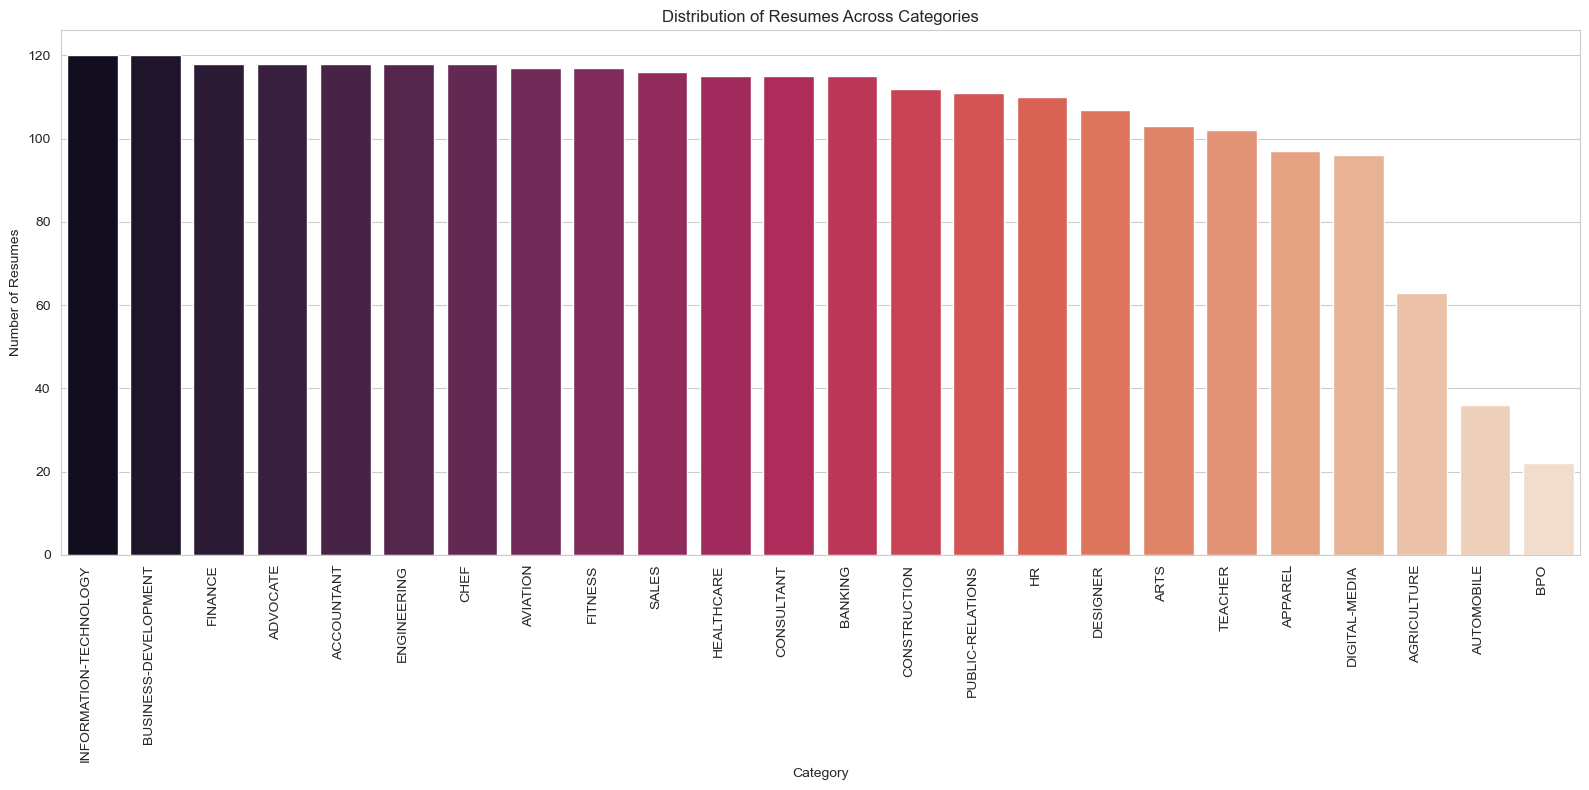


--- Top 5 Resume Categories ---
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
Name: count, dtype: int64


In [72]:
plt.figure(figsize=(16, 8))
category_counts = df['Category'].value_counts().sort_values(ascending=False)
sns.barplot(x=category_counts.index, y=category_counts.values, palette="rocket")
plt.xticks(rotation=90, ha='right')
plt.title('Distribution of Resumes Across Categories')
plt.ylabel('Number of Resumes')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

print("\n--- Top 5 Resume Categories ---")
print(category_counts.head())

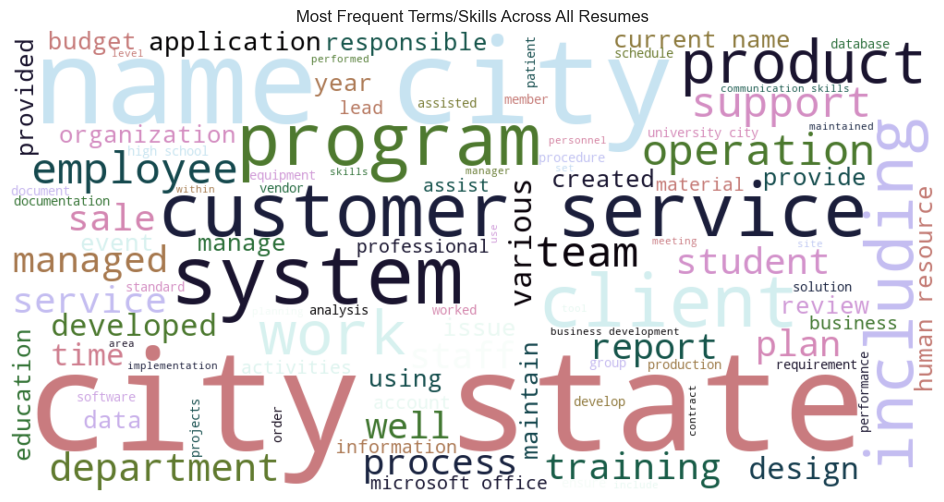

In [74]:
# Generating Word Cloud
all_resumes_text = " ".join(df['Processed_Resume'].tolist())

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    max_words=100,
    colormap='cubehelix',
    min_font_size=8
).generate(all_resumes_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Terms/Skills Across All Resumes')
plt.show()

In [76]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['Processed_Resume'])


feature_names = vectorizer.get_feature_names_out()

# Calculating the total TF-IDF score for each feature
total_scores = tfidf_matrix.sum(axis=0).tolist()[0]
tfidf_df = pd.DataFrame({'Term': feature_names, 'Total_TFIDF_Score': total_scores})
tfidf_df = tfidf_df.sort_values(by='Total_TFIDF_Score', ascending=False).reset_index(drop=True)

C:\Users\dehi\AppData\Local\Temp\ipykernel_7016\2909556918.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_TFIDF_Score', y='Term', data=top_terms, palette='mako')


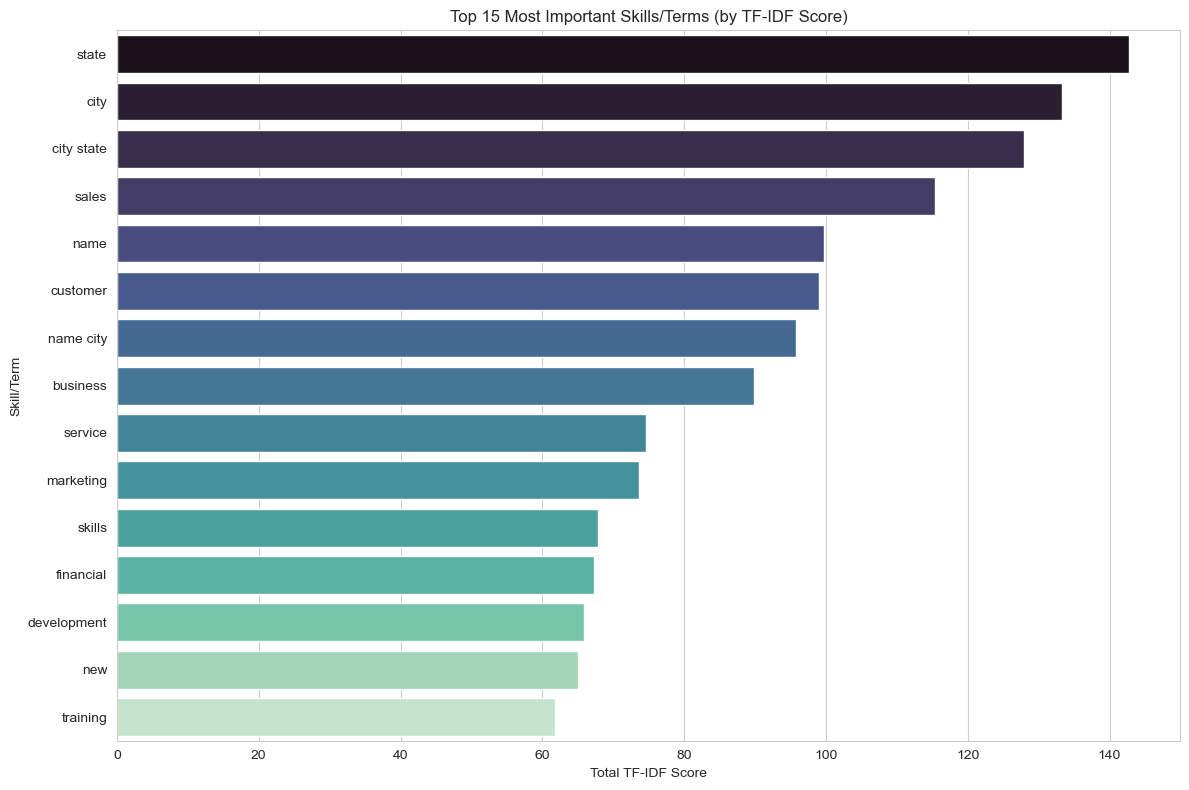


--- Top 15 Skill/Term Insights (for Business Recommendations) ---
           Term  Total_TFIDF_Score
0         state         142.803209
1          city         133.248424
2    city state         127.870755
3         sales         115.320921
4          name          99.663068
5      customer          98.974786
6     name city          95.843507
7      business          89.834189
8       service          74.606835
9     marketing          73.595160
10       skills          67.834288
11    financial          67.326687
12  development          65.864657
13          new          65.015334
14     training          61.826611


In [77]:
# Visualization of Top 15 Terms
top_terms = tfidf_df.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Total_TFIDF_Score', y='Term', data=top_terms, palette='mako')
plt.title('Top 15 Most Important Skills/Terms (by TF-IDF Score)')
plt.xlabel('Total TF-IDF Score')
plt.ylabel('Skill/Term')
plt.tight_layout()
plt.show()

print("\n--- Top 15 Skill/Term Insights (for Business Recommendations) ---")
print(top_terms)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [82]:
print("\n--- Starting Predictive Modeling ---")
X = df['Processed_Resume']
y = df['Category']


--- Starting Predictive Modeling ---


In [84]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [86]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [90]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [92]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Model Accuracy: 55.13%

Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.51      0.88      0.65        24
              ADVOCATE       0.33      0.42      0.37        24
           AGRICULTURE       1.00      0.08      0.14        13
               APPAREL       0.50      0.05      0.10        19
                  ARTS       0.75      0.14      0.24        21
            AUTOMOBILE       0.00      0.00      0.00         7
              AVIATION       0.82      0.58      0.68        24
               BANKING       0.87      0.57      0.68        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.36      0.83      0.50        24
                  CHEF       0.81      0.71      0.76        24
          CONSTRUCTION       0.64      0.73      0.68        22
            CONSULTANT       1.00      0.09      0.16        23
              DESIGNER       0.75      0.57      0.65  

C:\Users\dehi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dehi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dehi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


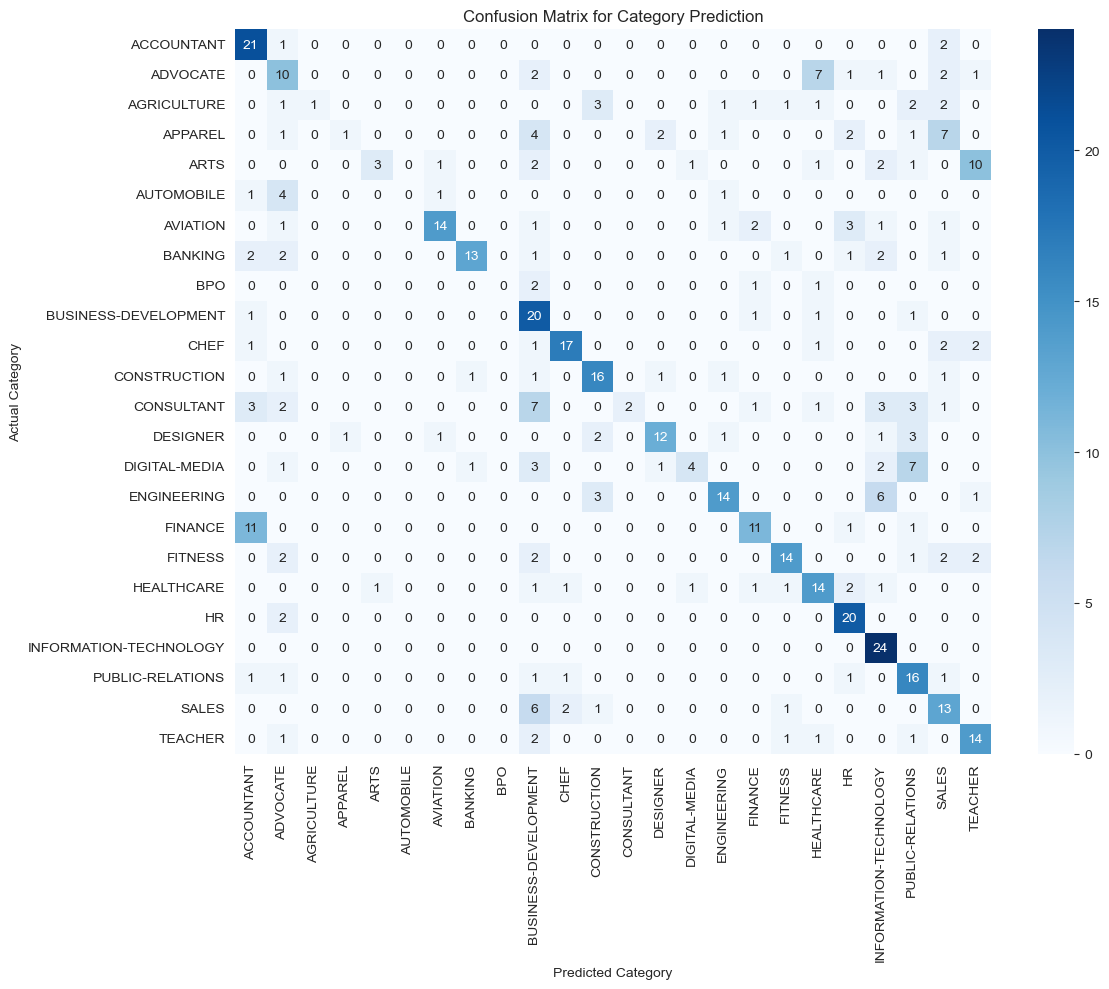


--- Predictive Modeling Complete ---


In [94]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Category Prediction')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.tight_layout()
plt.show()

print("\n--- Predictive Modeling Complete ---")

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
print("\n--- IMPROVED Predictive Modeling (LinearSVC) ---")
X = df['Processed_Resume']
y = df['Category']


--- IMPROVED Predictive Modeling (LinearSVC) ---


In [100]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [102]:
try:
    _ = X_tfidf.shape
except NameError:
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_tfidf = tfidf_vectorizer.fit_transform(X)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [106]:
svc_model = LinearSVC(random_state=42, C=1.0)
svc_model.fit(X_train, y_train)

LinearSVC(random_state=42)

In [108]:
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy (LinearSVC): {accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Model Accuracy (LinearSVC): 70.82%

Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.71      0.83      0.77        24
              ADVOCATE       0.64      0.75      0.69        24
           AGRICULTURE       1.00      0.62      0.76        13
               APPAREL       0.56      0.26      0.36        19
                  ARTS       0.53      0.38      0.44        21
            AUTOMOBILE       1.00      0.43      0.60         7
              AVIATION       0.82      0.75      0.78        24
               BANKING       0.75      0.78      0.77        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.53      0.75      0.62        24
                  CHEF       0.82      0.75      0.78        24
          CONSTRUCTION       0.76      0.86      0.81        22
            CONSULTANT       0.67      0.35      0.46        23
              DESIGNER       0.90      0.86

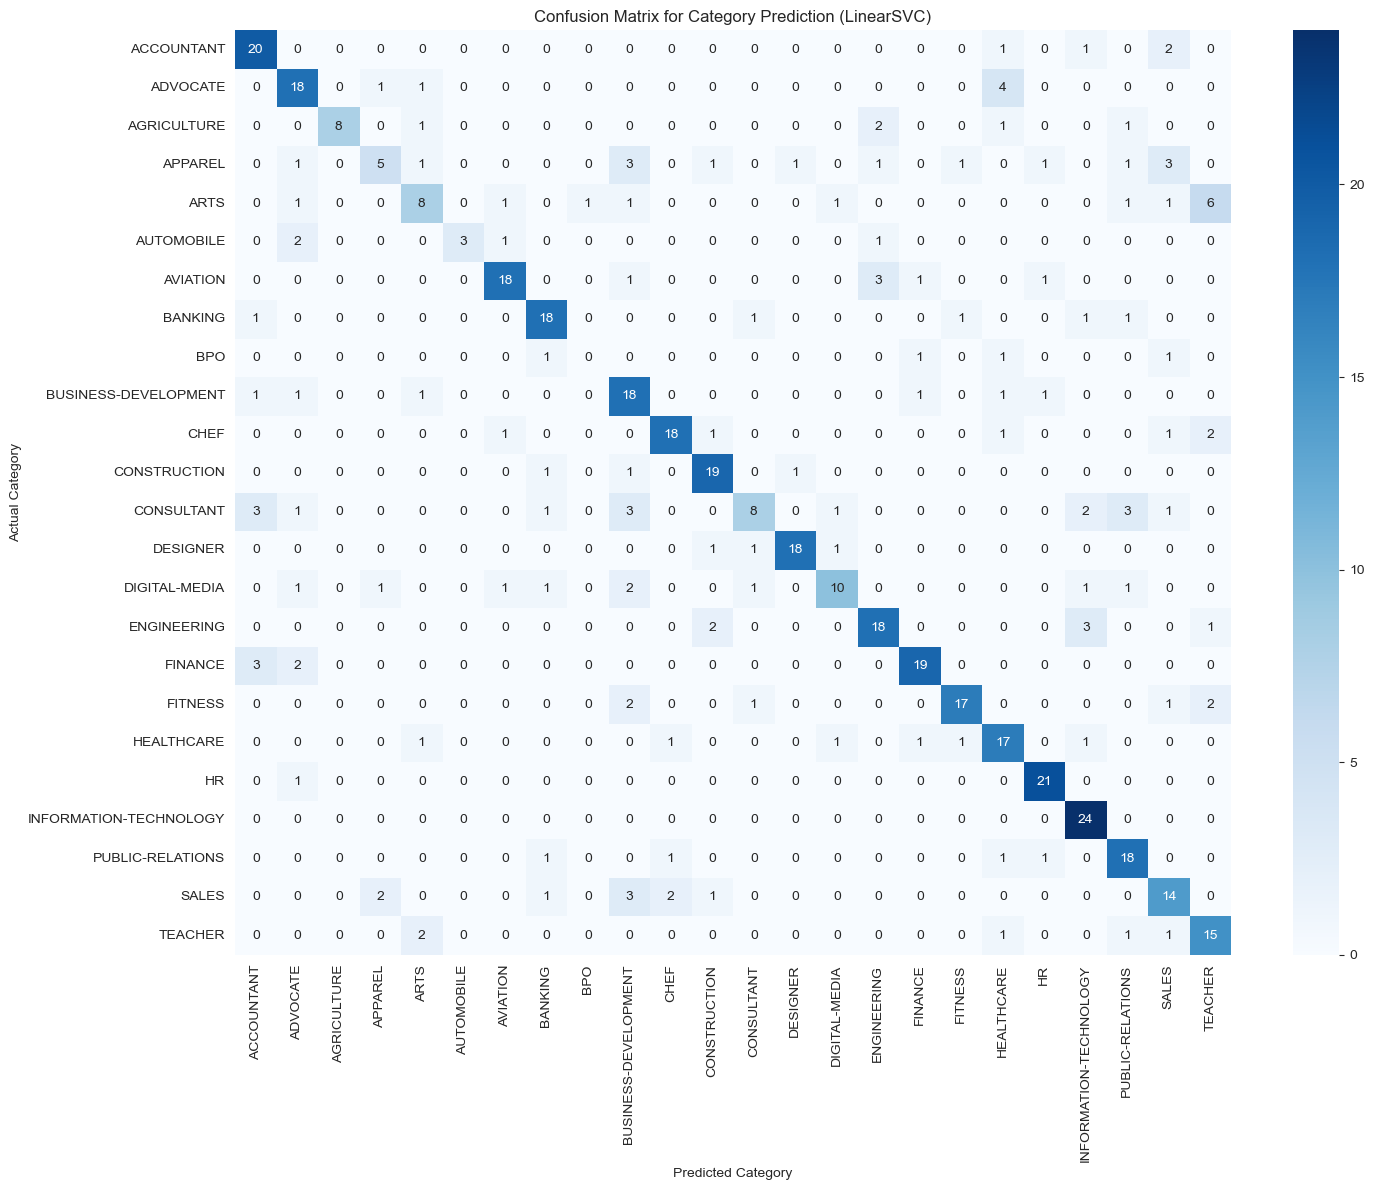


--- Improved Predictive Modeling Complete ---


In [110]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Category Prediction (LinearSVC)')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.tight_layout()
plt.show()

print("\n--- Improved Predictive Modeling Complete ---")

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [114]:
print("\n--- Improved Predictive Modeling (LinearSVC) ---")
X = df['Processed_Resume']
y = df['Category']


--- Improved Predictive Modeling (LinearSVC) ---


In [116]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [120]:
tfidf_vectorizer_tuned = TfidfVectorizer(ngram_range=(1, 3), max_features=10000) 
X_tfidf_tuned = tfidf_vectorizer_tuned.fit_transform(X)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_tuned, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [122]:
svc_model_tuned = LinearSVC(random_state=42, C=1.0)
svc_model_tuned.fit(X_train, y_train)

LinearSVC(random_state=42)

In [123]:
y_pred = svc_model_tuned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy (LinearSVC + 1,3-gram Features): {accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Model Accuracy (LinearSVC + 1,3-gram Features): 72.64%

Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.72      0.88      0.79        24
              ADVOCATE       0.69      0.75      0.72        24
           AGRICULTURE       1.00      0.62      0.76        13
               APPAREL       0.58      0.37      0.45        19
                  ARTS       0.62      0.48      0.54        21
            AUTOMOBILE       0.75      0.43      0.55         7
              AVIATION       0.85      0.71      0.77        24
               BANKING       0.75      0.78      0.77        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.72      0.88      0.79        24
                  CHEF       0.86      0.75      0.80        24
          CONSTRUCTION       0.76      0.86      0.81        22
            CONSULTANT       0.69      0.39      0.50        23
              DESIGNER 

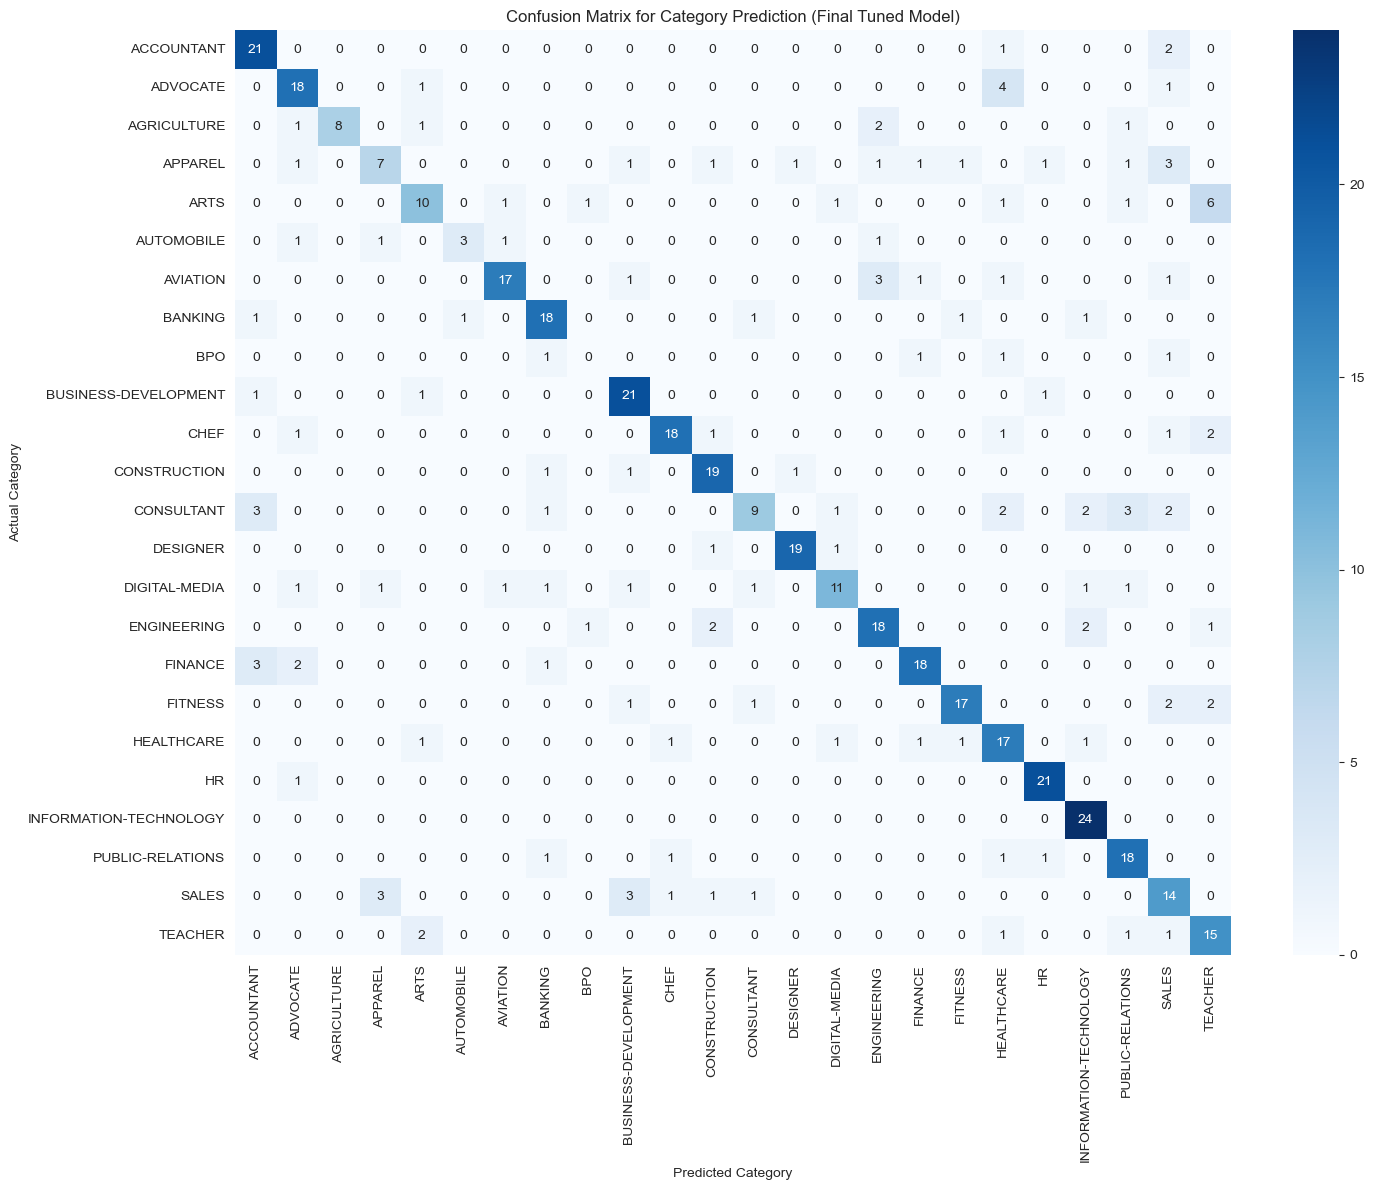


--- Final Predictive Modeling Complete ---


In [124]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Category Prediction (Final Tuned Model)')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.tight_layout()
plt.show()

print("\n--- Final Predictive Modeling Complete ---")